In [ ]:
using BenchmarkTools
using LinearAlgebra          ### Linear algebra library
using Plots                  ### Library to make plots
using DifferentialEquations  ### Library to use differential equations
using Tullio                 ### Library to work with tensors
using Base.Threads           ### Function to check the number of threads 
using DelimitedFiles         ### Manipulate files 
using LaTeXStrings           ### Latex strings
using StaticArrays
using Serialization

using DelimitedFiles
using PyPlot
using PyCall
using IJulia

# PIC 1

In [28]:
name="PIC_1"

"PIC_1"

In [29]:
cspins_f = readdlm("./TD/data/cspins_$(name)_jl.txt" , ' ')
seq_f = readdlm("./TD/data/seq_$(name)_jl.txt" , ' ') ;
#rkvec_f = readdlm("./data/rkvec_jl.txt", ',' ,Complex{Float64} ) ;
sneq_f = readdlm("./TD/data/sneq_$(name)_jl.txt" , ' ')
seq_f = readdlm("./TD/data/seq_$(name)_jl.txt" , ' ')
sc_f = readdlm("./TD/data/sc_$(name)_jl.txt" , ' ')
cc_f = readdlm("./TD/data/cc_$(name)_jl.txt" , ' ') ;

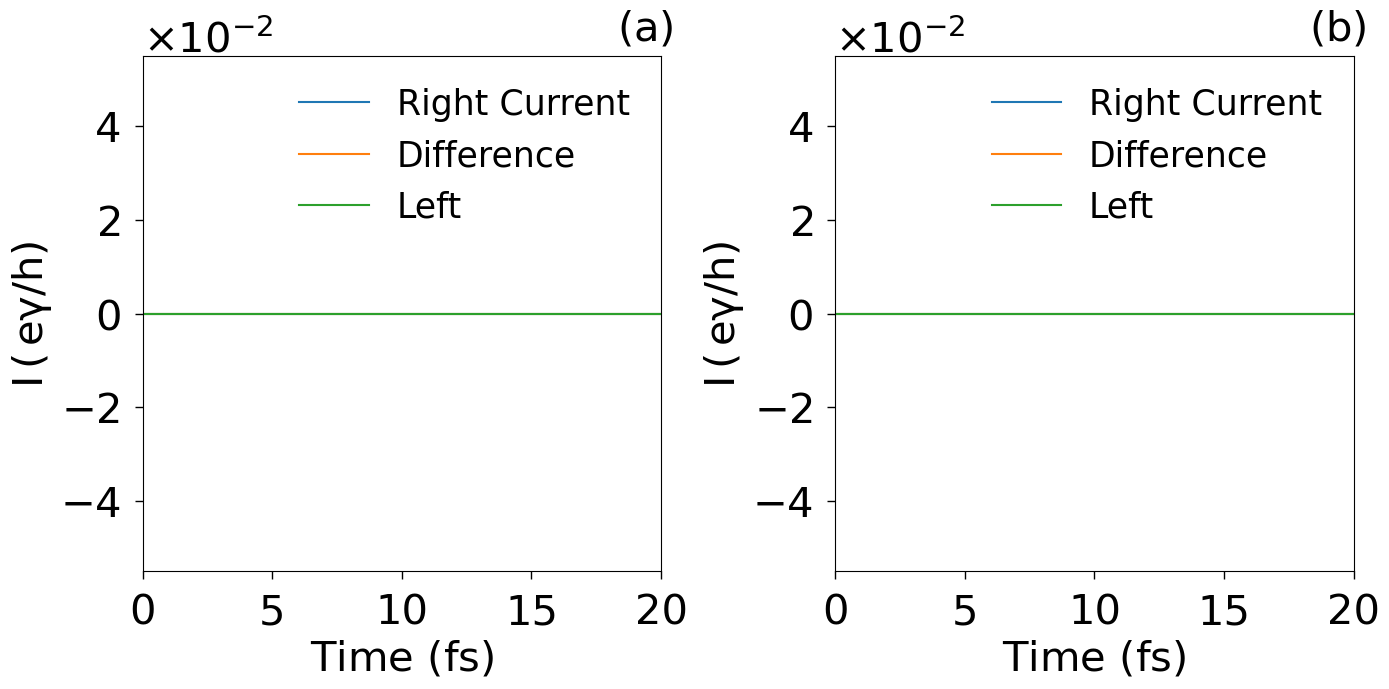

In [30]:
x  = sc_f[:,1]
y1 = sc_f[:,4]
y2 = sc_f[:,2]
y3 = sc_f[:,3]

fs = 30

# Create a 1×2 grid
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
ax1, ax2 = axs  # unpack the two axes

# --- subplot (a) ---
# Plot three curves
ax1.plot(x, y1, label="Right Current", linewidth=1.5)
ax1.plot(x, y2, label="Difference",     linewidth=1.5)
ax1.plot(x, y3, label="Left",           linewidth=1.5)

# Axis formatting
ax1.set_xlim(0, 20)
ax1.set_xlabel(raw"$\mathrm{Time\ (fs)}$", fontsize=fs)
ax1.set_ylabel(raw"$\mathrm{I\,(\,e\gamma/h)}$", fontsize=fs)
ax1.tick_params(axis="both", which="both",
                labelsize=fs, direction="out",
                length=6, width=1, pad=10)
ax1.ticklabel_format(axis="y", style="sci",
                     scilimits=(-1,2), useMathText=true)
ax1.yaxis.offsetText.set_fontsize(fs)

# Panel letter
ax1.text(0.97, 1.03, raw"$\rm{(a)}$",
         fontsize=fs, ha="center",
         transform=ax1.transAxes)

# Legend
ax1.legend(frameon=false, fontsize=fs-5, loc="upper right")


# --- subplot (b) ---
# Plot three curves
ax2.plot(x, y1, label="Right Current", linewidth=1.5)
ax2.plot(x, y2, label="Difference",     linewidth=1.5)
ax2.plot(x, y3, label="Left",           linewidth=1.5)

# Axis formatting
ax2.set_xlim(0, 20)
ax2.set_xlabel(raw"$\mathrm{Time\ (fs)}$", fontsize=fs)
ax2.set_ylabel(raw"$\mathrm{I\,(\,e\gamma/h)}$", fontsize=fs)
ax2.tick_params(axis="both", which="both",
                labelsize=fs, direction="out",
                length=6, width=1, pad=10)
ax2.ticklabel_format(axis="y", style="sci",
                     scilimits=(-1,2), useMathText=true)
ax2.yaxis.offsetText.set_fontsize(fs)

# Panel letter
ax2.text(0.97, 1.03, raw"$\rm{(b)}$",
         fontsize=fs, ha="center",
         transform=ax2.transAxes)

# Legend
ax2.legend(frameon=false, fontsize=fs-5, loc="upper right")


fig.tight_layout()
display(fig)

# PIC 2

In [25]:
name="PIC_2"

"PIC_2"

In [26]:
cspins_f = readdlm("./TD/data/cspins_$(name)_jl.txt" , ' ')
seq_f = readdlm("./TD/data/seq_$(name)_jl.txt" , ' ') ;
#rkvec_f = readdlm("./data/rkvec_jl.txt", ',' ,Complex{Float64} ) ;
sneq_f = readdlm("./TD/data/sneq_$(name)_jl.txt" , ' ')
seq_f = readdlm("./TD/data/seq_$(name)_jl.txt" , ' ')
sc_f = readdlm("./TD/data/sc_$(name)_jl.txt" , ' ')
cc_f = readdlm("./TD/data/cc_$(name)_jl.txt" , ' ') ;

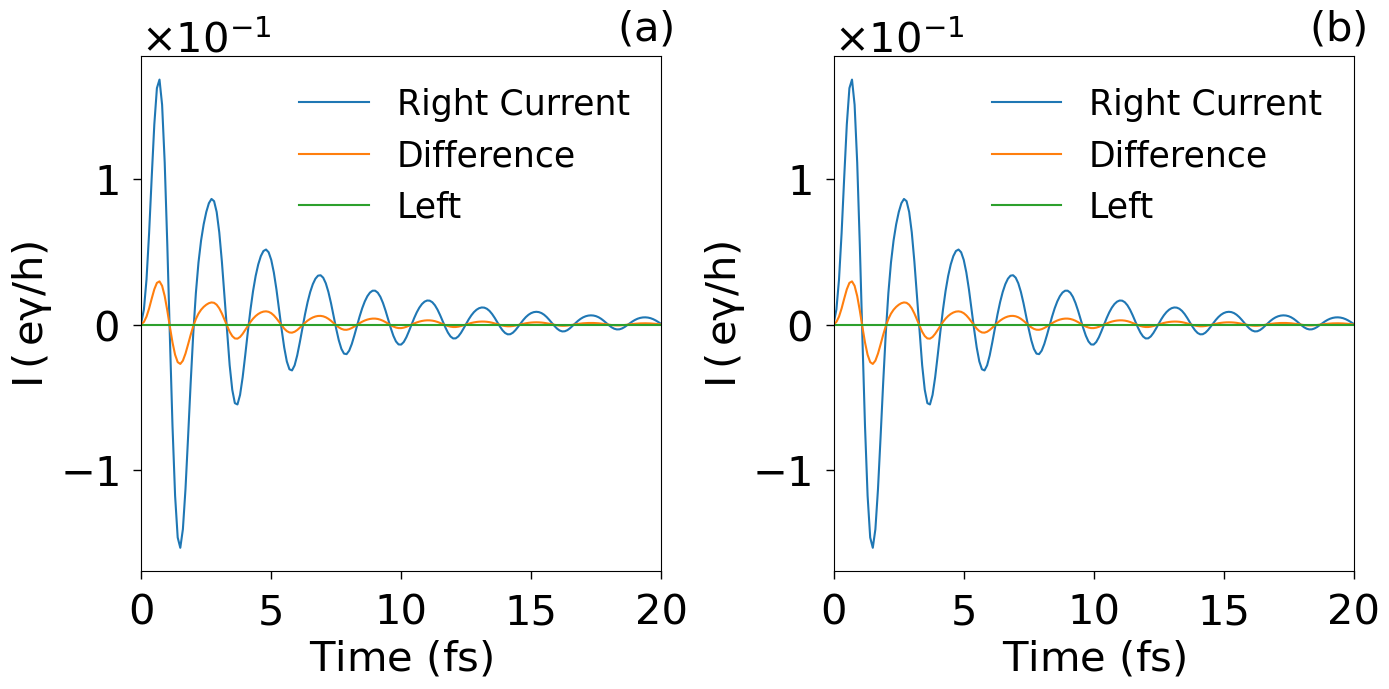

In [27]:
x  = sc_f[:,1]
y1 = sc_f[:,4]
y2 = sc_f[:,2]
y3 = sc_f[:,3]

fs = 30

# Create a 1×2 grid
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
ax1, ax2 = axs  # unpack the two axes

# --- subplot (a) ---
# Plot three curves
ax1.plot(x, y1, label="Right Current", linewidth=1.5)
ax1.plot(x, y2, label="Difference",     linewidth=1.5)
ax1.plot(x, y3, label="Left",           linewidth=1.5)

# Axis formatting
ax1.set_xlim(0, 20)
ax1.set_xlabel(raw"$\mathrm{Time\ (fs)}$", fontsize=fs)
ax1.set_ylabel(raw"$\mathrm{I\,(\,e\gamma/h)}$", fontsize=fs)
ax1.tick_params(axis="both", which="both",
                labelsize=fs, direction="out",
                length=6, width=1, pad=10)
ax1.ticklabel_format(axis="y", style="sci",
                     scilimits=(-1,2), useMathText=true)
ax1.yaxis.offsetText.set_fontsize(fs)

# Panel letter
ax1.text(0.97, 1.03, raw"$\rm{(a)}$",
         fontsize=fs, ha="center",
         transform=ax1.transAxes)

# Legend
ax1.legend(frameon=false, fontsize=fs-5, loc="upper right")


# --- subplot (b) ---
# Plot three curves
ax2.plot(x, y1, label="Right Current", linewidth=1.5)
ax2.plot(x, y2, label="Difference",     linewidth=1.5)
ax2.plot(x, y3, label="Left",           linewidth=1.5)

# Axis formatting
ax2.set_xlim(0, 20)
ax2.set_xlabel(raw"$\mathrm{Time\ (fs)}$", fontsize=fs)
ax2.set_ylabel(raw"$\mathrm{I\,(\,e\gamma/h)}$", fontsize=fs)
ax2.tick_params(axis="both", which="both",
                labelsize=fs, direction="out",
                length=6, width=1, pad=10)
ax2.ticklabel_format(axis="y", style="sci",
                     scilimits=(-1,2), useMathText=true)
ax2.yaxis.offsetText.set_fontsize(fs)

# Panel letter
ax2.text(0.97, 1.03, raw"$\rm{(b)}$",
         fontsize=fs, ha="center",
         transform=ax2.transAxes)

# Legend
ax2.legend(frameon=false, fontsize=fs-5, loc="upper right")


fig.tight_layout()
display(fig)

# PIC 3

In [35]:
name="PIC_3"

"PIC_3"

In [36]:
cspins_f = readdlm("./TD/data/cspins_$(name)_jl.txt" , ' ')
seq_f = readdlm("./TD/data/seq_$(name)_jl.txt" , ' ') ;
#rkvec_f = readdlm("./data/rkvec_jl.txt", ',' ,Complex{Float64} ) ;
sneq_f = readdlm("./TD/data/sneq_$(name)_jl.txt" , ' ')
seq_f = readdlm("./TD/data/seq_$(name)_jl.txt" , ' ')
sc_f = readdlm("./TD/data/sc_$(name)_jl.txt" , ' ')
cc_f = readdlm("./TD/data/cc_$(name)_jl.txt" , ' ') ;

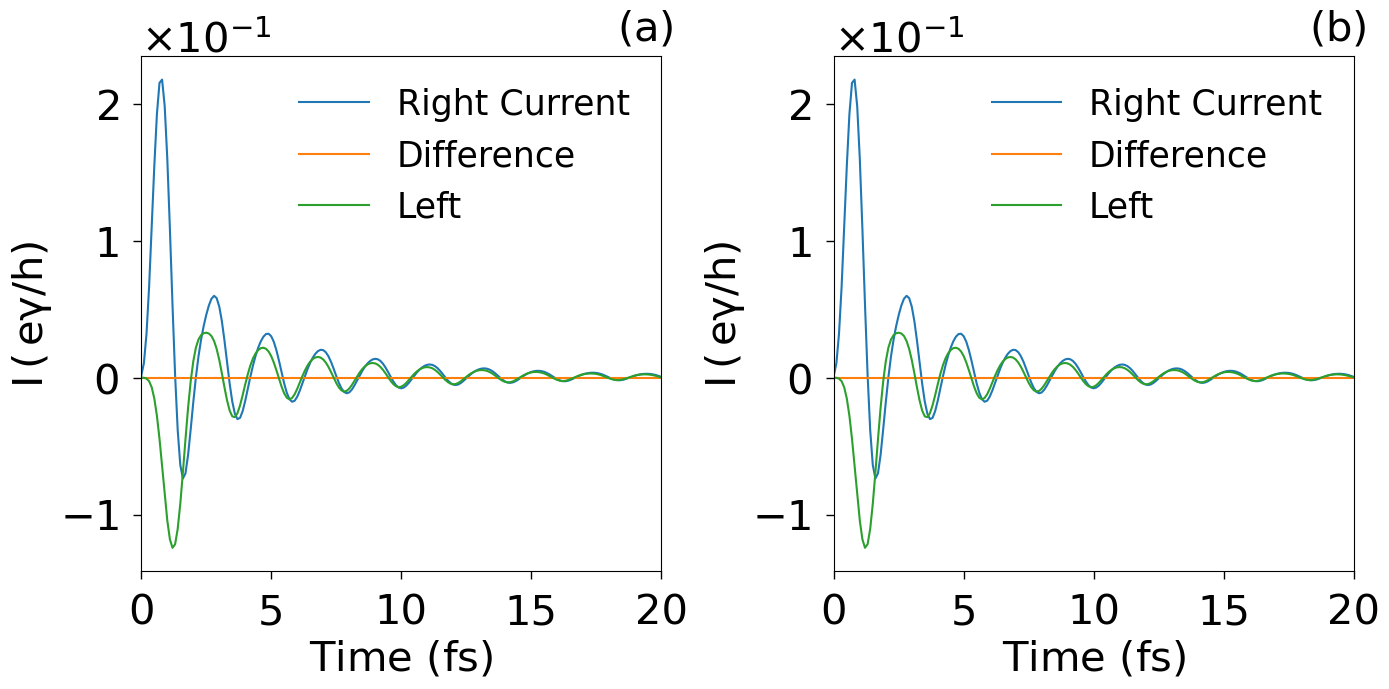

In [37]:
x  = sc_f[:,1]
y1 = sc_f[:,4]
y2 = sc_f[:,2]
y3 = sc_f[:,3]

fs = 30

# Create a 1×2 grid
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
ax1, ax2 = axs  # unpack the two axes

# --- subplot (a) ---
# Plot three curves
ax1.plot(x, y1, label="Right Current", linewidth=1.5)
ax1.plot(x, y2, label="Difference",     linewidth=1.5)
ax1.plot(x, y3, label="Left",           linewidth=1.5)

# Axis formatting
ax1.set_xlim(0, 20)
ax1.set_xlabel(raw"$\mathrm{Time\ (fs)}$", fontsize=fs)
ax1.set_ylabel(raw"$\mathrm{I\,(\,e\gamma/h)}$", fontsize=fs)
ax1.tick_params(axis="both", which="both",
                labelsize=fs, direction="out",
                length=6, width=1, pad=10)
ax1.ticklabel_format(axis="y", style="sci",
                     scilimits=(-1,2), useMathText=true)
ax1.yaxis.offsetText.set_fontsize(fs)

# Panel letter
ax1.text(0.97, 1.03, raw"$\rm{(a)}$",
         fontsize=fs, ha="center",
         transform=ax1.transAxes)

# Legend
ax1.legend(frameon=false, fontsize=fs-5, loc="upper right")


# --- subplot (b) ---
# Plot three curves
ax2.plot(x, y1, label="Right Current", linewidth=1.5)
ax2.plot(x, y2, label="Difference",     linewidth=1.5)
ax2.plot(x, y3, label="Left",           linewidth=1.5)

# Axis formatting
ax2.set_xlim(0, 20)
ax2.set_xlabel(raw"$\mathrm{Time\ (fs)}$", fontsize=fs)
ax2.set_ylabel(raw"$\mathrm{I\,(\,e\gamma/h)}$", fontsize=fs)
ax2.tick_params(axis="both", which="both",
                labelsize=fs, direction="out",
                length=6, width=1, pad=10)
ax2.ticklabel_format(axis="y", style="sci",
                     scilimits=(-1,2), useMathText=true)
ax2.yaxis.offsetText.set_fontsize(fs)

# Panel letter
ax2.text(0.97, 1.03, raw"$\rm{(b)}$",
         fontsize=fs, ha="center",
         transform=ax2.transAxes)

# Legend
ax2.legend(frameon=false, fontsize=fs-5, loc="upper right")


fig.tight_layout()
display(fig)

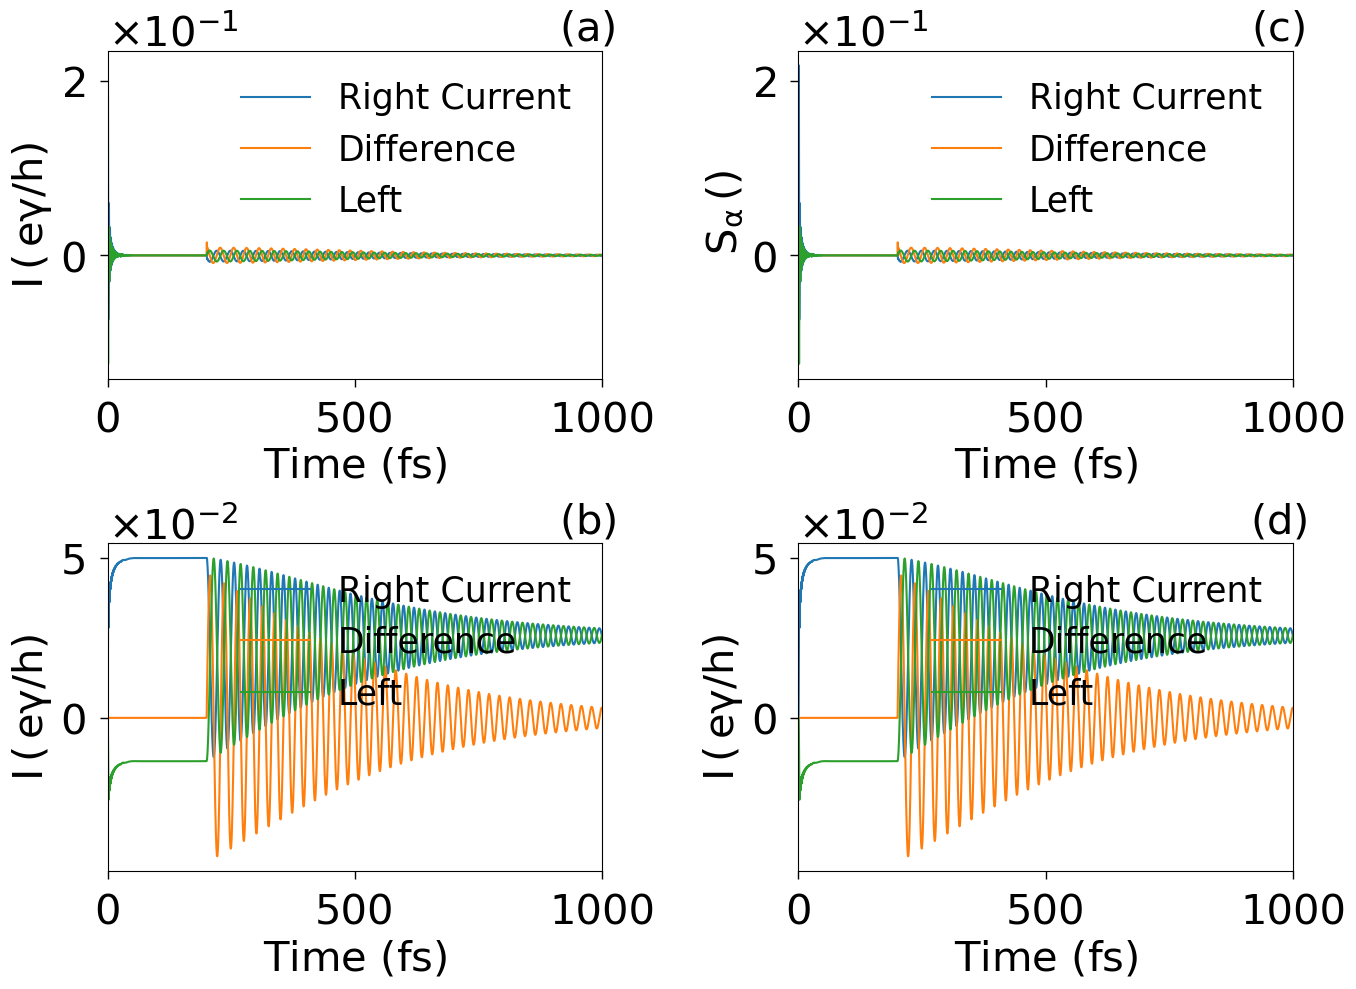

In [38]:
using DelimitedFiles
using PyPlot
using PyCall
using IJulia

# your data
x  = sc_f[:,1]
y11 = sc_f[:,4]
y12 = sc_f[:,2]
y13 = sc_f[:,3]

y31 = sneq_f[:,4]
y32 = sneq_f[:,2]
y33 = sneq_f[:,3]

fs = 30

# Create a 2×2 grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
ax1, ax2, ax3, ax4 = axs[:]   # flatten into a 4‐element vector

# --- subplot (a) ---
ax1.plot(x, y11, label="Right Current", linewidth=1.5)
ax1.plot(x, y12, label="Difference",     linewidth=1.5)
ax1.plot(x, y13, label="Left",           linewidth=1.5)
ax1.set_xlim(0, 1000)
ax1.set_xlabel(raw"$\mathrm{Time\ (fs)}$", fontsize=fs)
ax1.set_ylabel(raw"$\mathrm{I\,(\,e\gamma/h)}$", fontsize=fs)
ax1.tick_params(axis="both", which="both",
                labelsize=fs, direction="out",
                length=6, width=1, pad=10)
ax1.ticklabel_format(axis="y", style="sci",
                     scilimits=(-1,2), useMathText=true)
ax1.yaxis.offsetText.set_fontsize(fs)
ax1.text(0.97, 1.03, raw"$\rm{(a)}$",
         fontsize=fs, ha="center",
         transform=ax1.transAxes)
ax1.legend(frameon=false, fontsize=fs-5, loc="upper right")


# --- subplot (b) ---
ax2.plot(x, y31, label="Right Current", linewidth=1.5)
ax2.plot(x, y32, label="Difference",     linewidth=1.5)
ax2.plot(x, y33, label="Left",           linewidth=1.5)
ax2.set_xlim(0, 1000)
ax2.set_xlabel(raw"$\mathrm{Time\ (fs)}$", fontsize=fs)
ax3.set_ylabel(raw"$\mathrm{\,S_\alpha \,()}$", fontsize=fs)
ax2.tick_params(axis="both", which="both",
                labelsize=fs, direction="out",
                length=6, width=1, pad=10)
ax2.ticklabel_format(axis="y", style="sci",
                     scilimits=(-1,2), useMathText=true)
ax2.yaxis.offsetText.set_fontsize(fs)
ax2.text(0.97, 1.03, raw"$\rm{(b)}$",
         fontsize=fs, ha="center",
         transform=ax2.transAxes)
ax2.legend(frameon=false, fontsize=fs-5, loc="upper right")


# --- subplot (c) ---
ax3.plot(x, y11, label="Right Current", linewidth=1.5)
ax3.plot(x, y12, label="Difference",     linewidth=1.5)
ax3.plot(x, y13, label="Left",           linewidth=1.5)
ax3.set_xlim(0, 1000)
ax3.set_xlabel(raw"$\mathrm{Time\ (fs)}$", fontsize=fs)
ax2.set_ylabel(raw"$\mathrm{I\,(\,e\gamma/h)}$", fontsize=fs)
ax3.tick_params(axis="both", which="both",
                labelsize=fs, direction="out",
                length=6, width=1, pad=10)
ax3.ticklabel_format(axis="y", style="sci",
                     scilimits=(-1,2), useMathText=true)
ax3.yaxis.offsetText.set_fontsize(fs)
ax3.text(0.97, 1.03, raw"$\rm{(c)}$",
         fontsize=fs, ha="center",
         transform=ax3.transAxes)
ax3.legend(frameon=false, fontsize=fs-5, loc="upper right")


# --- subplot (d) ---
ax4.plot(x, y31, label="Right Current", linewidth=1.5)
ax4.plot(x, y32, label="Difference",     linewidth=1.5)
ax4.plot(x, y33, label="Left",           linewidth=1.5)
ax4.set_xlim(0, 1000)
ax4.set_xlabel(raw"$\mathrm{Time\ (fs)}$", fontsize=fs)
ax4.set_ylabel(raw"$\mathrm{I\,(\,e\gamma/h)}$", fontsize=fs)
ax4.tick_params(axis="both", which="both",
                labelsize=fs, direction="out",
                length=6, width=1, pad=10)
ax4.ticklabel_format(axis="y", style="sci",
                     scilimits=(-1,2), useMathText=true)
ax4.yaxis.offsetText.set_fontsize(fs)
ax4.text(0.97, 1.03, raw"$\rm{(d)}$",
         fontsize=fs, ha="center",
         transform=ax4.transAxes)
ax4.legend(frameon=false, fontsize=fs-5, loc="upper right")


fig.tight_layout()
display(fig)
